<a href="https://colab.research.google.com/github/piconnnie/ML-projects/blob/main/DeepLearning_Project_by_Faraz_Ali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# Read The Data Set
from google.colab import drive
drive.mount('/content/drive')
signalDataDSOrig = pd.read_csv("/content/drive/MyDrive/Dataset/NN Project Data - Signal.csv")
signalDataDS=signalDataDSOrig.copy()
signalDataDS.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0    7.4000000    0.7000000    0.0000000    1.9000000    0.0760000   
1    7.8000000    0.8800000    0.0000000    2.6000000    0.0980000   
2    7.8000000    0.7600000    0.0400000    2.3000000    0.0920000   
3   11.2000000    0.2800000    0.5600000    1.9000000    0.0750000   
4    7.4000000    0.7000000    0.0000000    1.9000000    0.0760000   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0   11.0000000   34.0000000    0.9978000    3.5100000     0.5600000   
1   25.0000000   67.0000000    0.9968000    3.2000000     0.6800000   
2   15.0000000   54.0000000    0.9970000    3.2600000     0.6500000   
3   17.0000000   60.0000000    0.9980000    3.1600000     0.5800000   
4   11.0000000   34.0000000    0.9978000    3.5100000     0.5600000   

   Parameter 11  Signal_Strength  
0     9.4000000                5  
1     9.8000000                5  
2     9.8000000                5  
3     9.8000000                6  
4     9.4000000                5

In [ ]:
signalDataDS.shape

(1599, 12)

In [ ]:
 signalDataDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Preliminary describe , we would need to run this command again once we have cleaned up/updated /modified data
signalDataDS.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count 1599.0000000 1599.0000000 1599.0000000 1599.0000000 1599.0000000   
mean     8.3196373    0.5278205    0.2709756    2.5388055    0.0874665   
std      1.7410963    0.1790597    0.1948011    1.4099281    0.0470653   
min      4.6000000    0.1200000    0.0000000    0.9000000    0.0120000   
25%      7.1000000    0.3900000    0.0900000    1.9000000    0.0700000   
50%      7.9000000    0.5200000    0.2600000    2.2000000    0.0790000   
75%      9.2000000    0.6400000    0.4200000    2.6000000    0.0900000   
max     15.9000000    1.5800000    1.0000000   15.5000000    0.6110000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count 1599.0000000 1599.0000000 1599.0000000 1599.0000000  1599.0000000   
mean    15.8749218   46.4677924    0.9967467    3.3111132     0.6581488   
std     10.4601570   32.8953245    0.0018873    0.1543865     0.1695070   
min      1.0000000    6.0000000    0.9900700    2.7400000     0.3300000   
25%      7.0000000   22.0000000    0.9956000    3.2100000     0.5500000   
50%     14.0000000   38.0000000    0.9967500    3.3100000     0.6200000   
75%     21.0000000   62.0000000    0.9978350    3.4000000     0.7300000   
max     72.0000000  289.0000000    1.0036900    4.0100000     2.0000000   

       Parameter 11  Signal_Strength  
count  1599.0000000     1599.0000000  
mean     10.4229831        5.6360225  
std       1.0656676        0.8075694  
min       8.4000000        3.0000000  
25%       9.5000000        5.0000000  
50%      10.2000000        6.0000000  
75%      11.1000000        6.0000000  
max      14.9000000        8.0000000

As can be seen from the above steps, the final is a data set of 1599 rows/records and 12 attributes/columns
The data type are as follows : All attributes except target variable are of type float.
Target is of type int
There are NO standards null values present in the data
We do not know what the attributes signify and all the attributes are in different ranges. Scaling would be required which will be done at a later stage.

In [ ]:
signalDataDS.isna().sum().sum()

0

No Null Values found

In [ ]:
len(signalDataDS.columns)

12

In [ ]:
# We 11 float attributes and 1 int attribute
# Lets check if there are any undesirable values or non standard null values for all attributes

def isValidFloat(ip):
    if( isinstance(ip, float)):
        return True
    else:
        return False

def isValidInt(ip):
    if( isinstance(ip, int)):
        return True
    else:
        return False

In [ ]:

for i in range(0,len(signalDataDS.columns)):
    # Last columns is an  integer so using other func
    if(i==len(signalDataDS.columns)-1):
         print(signalDataDS.iloc[:,i].apply(isValidInt).sum())
    else:
         # All other columns are floats
        print(signalDataDS.iloc[:,i].apply(isValidFloat).sum())

1599
1599
1599
1599
1599
1599
1599
1599
1599
1599
1599
1599


Data is free of non standard null values, we can proceed.


<Axes: >

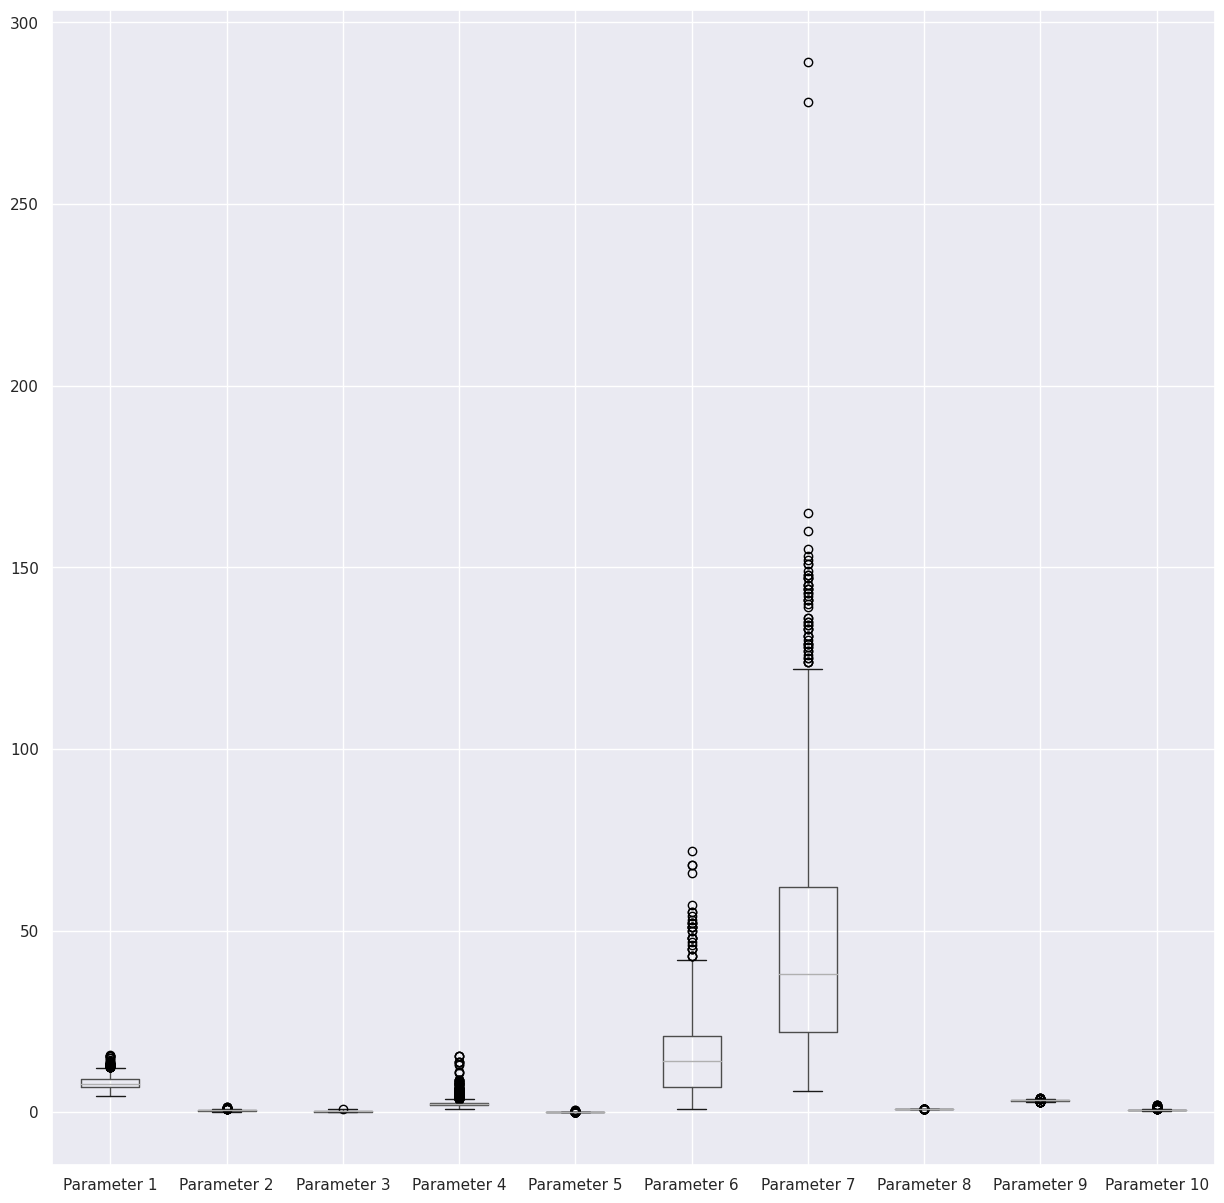

In [ ]:
# Lets do a check on first 5 variables to get an idea of outliers , just to get an idea
signalDataDS.iloc[:,0:10].boxplot(figsize=(15,15))

<Axes: ylabel='Parameter 1'>

<Axes: ylabel='Parameter 2'>

<Axes: ylabel='Parameter 3'>

<Axes: ylabel='Parameter 4'>

<Axes: ylabel='Parameter 5'>

<Axes: ylabel='Parameter 6'>

<Axes: ylabel='Parameter 7'>

<Axes: ylabel='Parameter 8'>

<Axes: ylabel='Parameter 9'>

<Axes: ylabel='Parameter 10'>

<Axes: ylabel='Parameter 11'>

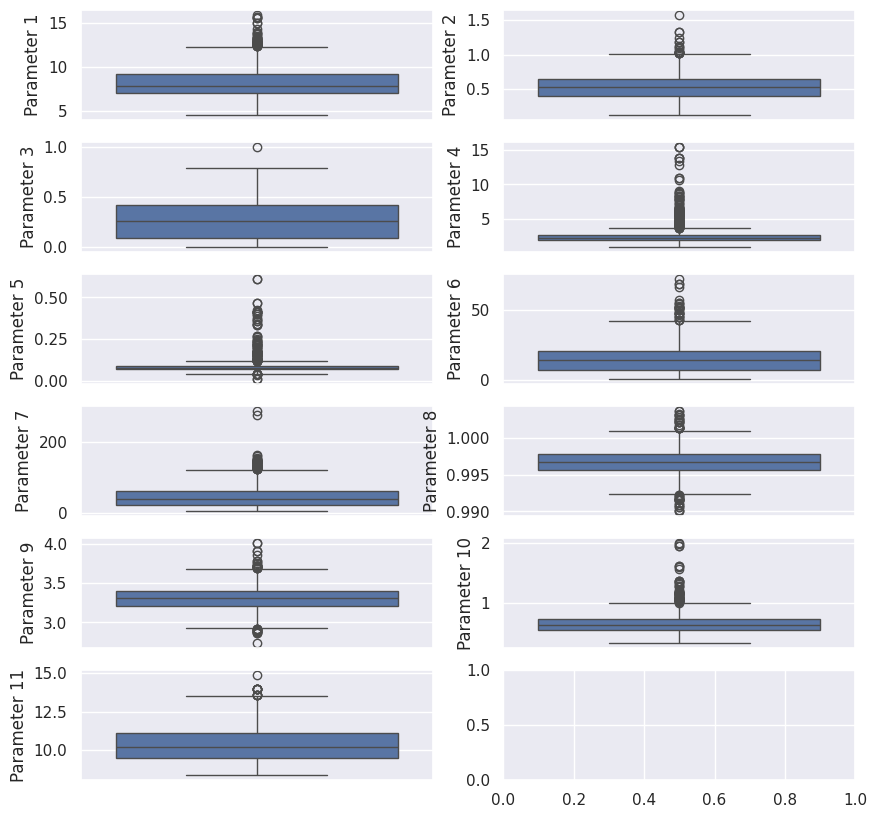

In [ ]:
#Another visualization
# Lets do a check on first 5 variables to get an idea of outliers , just to get an idea

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.boxplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.boxplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.boxplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.boxplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.boxplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.boxplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.boxplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.boxplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.boxplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.boxplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.boxplot(signalDataDS.iloc[:,10],ax=ax[5,0])

If variables have outliers , they will be taken care of , if variables do not have outliers , no action will be taken

Strategy for outliers - We will perform a capping for all outliers

In [ ]:
# Function to take care of outliers
#outliers at the upper end will be replaced by the upper whisker
#outliers at the lower end will be replaced by the lower whisker
def handleOutliers(columnIndex , columnInput , varOutlierTrackingDS):
    #Lets first identify whiskers for this(current) feature
    upper_quartile = np.percentile(columnInput, 75)
    lower_quartile = np.percentile(columnInput, 25)
    iqr = upper_quartile - lower_quartile

    # Set conventional whiskers
    upper_whisker = upper_quartile+1.5*iqr
    lower_whisker = lower_quartile-1.5*iqr

    #Check if whiskers need to overwritten
    colMax=columnInput.max()
    colMin=columnInput.min()
    if(colMax > upper_quartile and  colMax < upper_whisker):
        upper_whisker=colMax
    if(colMin < lower_quartile and  colMin > lower_whisker):
        lower_whisker=colMin

    #Identify and replace ouliers
    countOfOutliers=0
    for j in range(len(columnInput)):
        if(columnInput[j] > upper_whisker):
            columnInput[j]=upper_whisker
            countOfOutliers=countOfOutliers+1
        if(columnInput[j] < lower_whisker):
            columnInput[j]=lower_whisker
            countOfOutliers=countOfOutliers+1

    #Lets add each feature and no of outliers handled in each one into DF for tracking purpose
    varOutlierTrackingDS=varOutlierTrackingDS.append({'Feature_Label':columnIndex,'NoOfOutliersHandled':countOfOutliers,'UpWhisker':upper_whisker,'LowWhisker':lower_whisker},ignore_index=True)
    return varOutlierTrackingDS

In [ ]:
# Data structure to keep track of outliers
varOutlierTrackingDS=pd.DataFrame(columns=['Feature_Label','NoOfOutliersHandled','UpWhisker','LowWhisker'])

#Outer loop for all columns
varDSColList=np.arange(0,signalDataDS.columns.size-1,1)

for i in varDSColList:
    temp=signalDataDS.iloc[:,i]
    varOutlierTrackingDS=handleOutliers(i,temp,varOutlierTrackingDS)

#Lets have a look at the data on outliers
varOutlierTrackingDS
#Lets check how many variables contained outliers that were replaced
#varOutlierTrackingDS[varOutlierTrackingDS['NoOfOutliersHandled'] != 0.0]

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Function to take care of outliers
#outliers at the upper end will be replaced by the upper whisker
#outliers at the lower end will be replaced by the lower whisker
def handleOutliers(columnIndex , columnInput , varOutlierTrackingDS):
    #Lets first identify whiskers for this(current) feature
    upper_quartile = np.percentile(columnInput, 75)
    lower_quartile = np.percentile(columnInput, 25)
    iqr = upper_quartile - lower_quartile

    # Set conventional whiskers
    upper_whisker = upper_quartile+1.5*iqr
    lower_whisker = lower_quartile-1.5*iqr

    #Check if whiskers need to overwritten
    colMax=columnInput.max()
    colMin=columnInput.min()
    if(colMax > upper_quartile and  colMax < upper_whisker):
        upper_whisker=colMax
    if(colMin < lower_quartile and  colMin > lower_whisker):
        lower_whisker=colMin

    #Identify and replace ouliers
    countOfOutliers=0
    for j in range(len(columnInput)):
        if(columnInput[j] > upper_whisker):
            columnInput[j]=upper_whisker
            countOfOutliers=countOfOutliers+1
        if(columnInput[j] < lower_whisker):
            columnInput[j]=lower_whisker
            countOfOutliers=countOfOutliers+1

    #Lets add each feature and no of outliers handled in each one into DF for tracking purpose
    # varOutlierTrackingDS=varOutlierTrackingDS.append({'Feature_Label':columnIndex,'NoOfOutliersHandled':countOfOutliers,'UpWhisker':upper_whisker,'LowWhisker':lower_whisker},ignore_index=True)
    varOutlierTrackingDS = pd.concat([varOutlierTrackingDS, pd.DataFrame([{'Feature_Label':columnIndex,'NoOfOutliersHandled':countOfOutliers,'UpWhisker':upper_whisker,'LowWhisker':lower_whisker}])], ignore_index=True) # Use concat instead of append
    return varOutlierTrackingDS

In [ ]:
# Data structure to keep track of outliers
varOutlierTrackingDS=pd.DataFrame(columns=['Feature_Label','NoOfOutliersHandled','UpWhisker','LowWhisker'])

#Outer loop for all columns
varDSColList=np.arange(0,signalDataDS.columns.size-1,1)

for i in varDSColList:
    temp=signalDataDS.iloc[:,i]
    varOutlierTrackingDS=handleOutliers(i,temp,varOutlierTrackingDS)

#Lets have a look at the data on outliers
varOutlierTrackingDS
#Lets check how many variables contained outliers that were replaced
#varOutlierTrackingDS[varOutlierTrackingDS['NoOfOutliersHandled'] != 0.0]

Feature_Label NoOfOutliersHandled   UpWhisker  LowWhisker
0              0                   0  12.3500000   4.6000000
1              1                  19   1.0150000   0.1200000
2              2                   1   0.9150000   0.0000000
3              3                 155   3.6500000   0.9000000
4              4                 112   0.1200000   0.0400000
5              5                  30  42.0000000   1.0000000
6              6                  55 122.0000000   6.0000000
7              7                  45   1.0011875   0.9922475
8              8                  35   3.6850000   2.9250000
9              9                  59   1.0000000   0.3300000
10            10                  13  13.5000000   8.4000000

<Axes: ylabel='Parameter 1'>

<Axes: ylabel='Parameter 2'>

<Axes: ylabel='Parameter 3'>

<Axes: ylabel='Parameter 4'>

<Axes: ylabel='Parameter 5'>

<Axes: ylabel='Parameter 6'>

<Axes: ylabel='Parameter 7'>

<Axes: ylabel='Parameter 8'>

<Axes: ylabel='Parameter 9'>

<Axes: ylabel='Parameter 10'>

<Axes: ylabel='Parameter 11'>

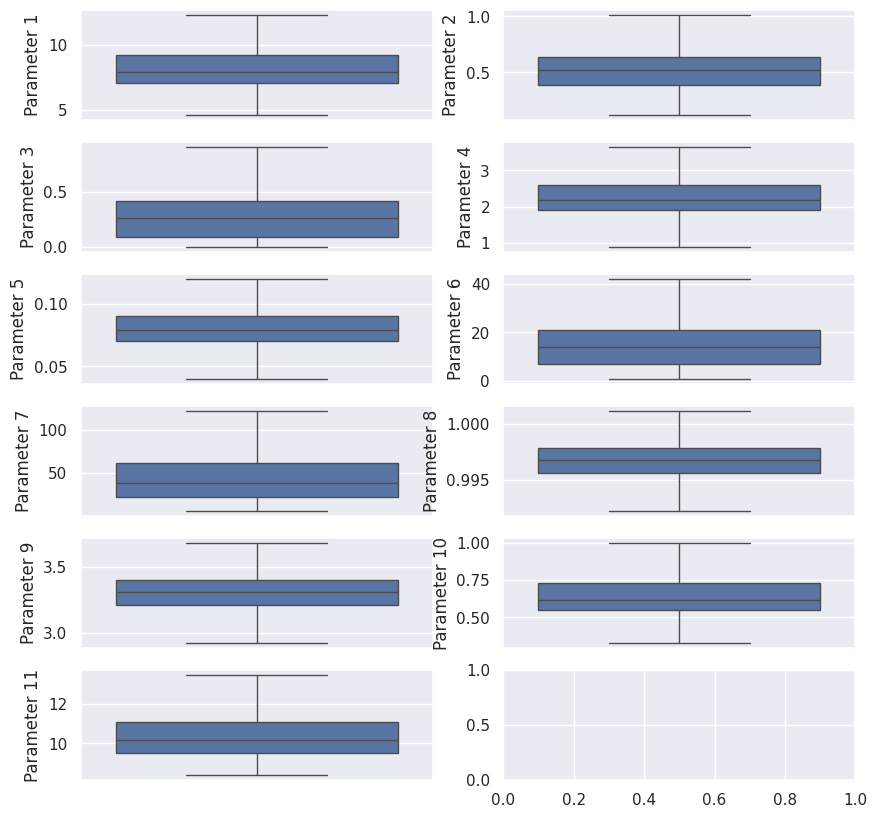

In [ ]:
#Another visualization
# Lets do a check on  11 independant variables to get an idea of outliers , just to get an idea

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.boxplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.boxplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.boxplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.boxplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.boxplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.boxplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.boxplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.boxplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.boxplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.boxplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.boxplot(signalDataDS.iloc[:,10],ax=ax[5,0])

**Result/Inference**
All 11 input features contained outliers which were taken care of
The above table lists which features contained outliers and the no of outliers it had

<Axes: ylabel='Density'>

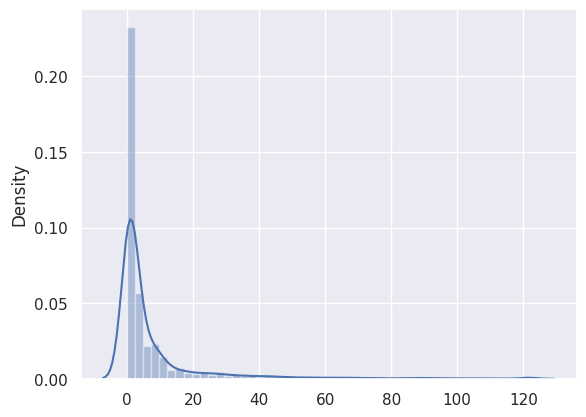

In [ ]:
# Lets have a quick look at the distributions of 11 input params
sns.distplot(signalDataDS.iloc[:,0:10])

<Axes: xlabel='Parameter 1', ylabel='Density'>

<Axes: xlabel='Parameter 2', ylabel='Density'>

<Axes: xlabel='Parameter 3', ylabel='Density'>

<Axes: xlabel='Parameter 4', ylabel='Density'>

<Axes: xlabel='Parameter 5', ylabel='Density'>

<Axes: xlabel='Parameter 6', ylabel='Density'>

<Axes: xlabel='Parameter 7', ylabel='Density'>

<Axes: xlabel='Parameter 8', ylabel='Density'>

<Axes: xlabel='Parameter 9', ylabel='Density'>

<Axes: xlabel='Parameter 10', ylabel='Density'>

<Axes: xlabel='Parameter 11', ylabel='Density'>

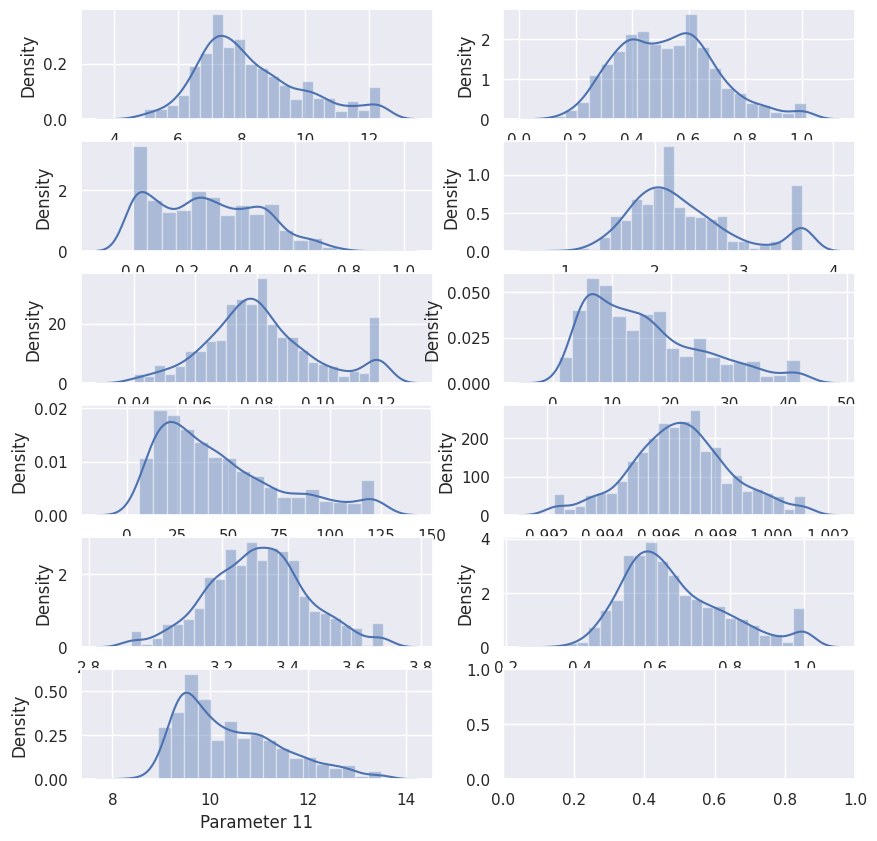

In [ ]:
#Another visualization
# Lets check the distribution of 11 independant variables

fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,10))
sns.distplot(signalDataDS.iloc[:,0],ax=ax[0,0])
sns.distplot(signalDataDS.iloc[:,1],ax=ax[0,1])
sns.distplot(signalDataDS.iloc[:,2],ax=ax[1,0])
sns.distplot(signalDataDS.iloc[:,3],ax=ax[1,1])
sns.distplot(signalDataDS.iloc[:,4],ax=ax[2,0])
sns.distplot(signalDataDS.iloc[:,5],ax=ax[2,1])
sns.distplot(signalDataDS.iloc[:,6],ax=ax[3,0])
sns.distplot(signalDataDS.iloc[:,7],ax=ax[3,1])
sns.distplot(signalDataDS.iloc[:,8],ax=ax[4,0])
sns.distplot(signalDataDS.iloc[:,9],ax=ax[4,1])
sns.distplot(signalDataDS.iloc[:,10],ax=ax[5,0])

<Axes: xlabel='Signal_Strength', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Signal Strength')

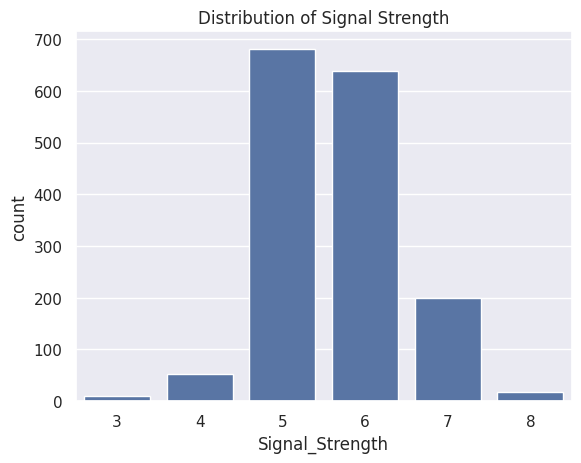

In [ ]:
  # Plotting the countplot
  sns.countplot(x=signalDataDS['Signal_Strength'])
  plt.title('Distribution of Signal Strength')
  plt.show()

**Inference/Result** :

Data Cleansing ,Eliminating feaures if required
NO features were eliminated.
Data was cleansed , outliers were handled
Data is ready for further processing

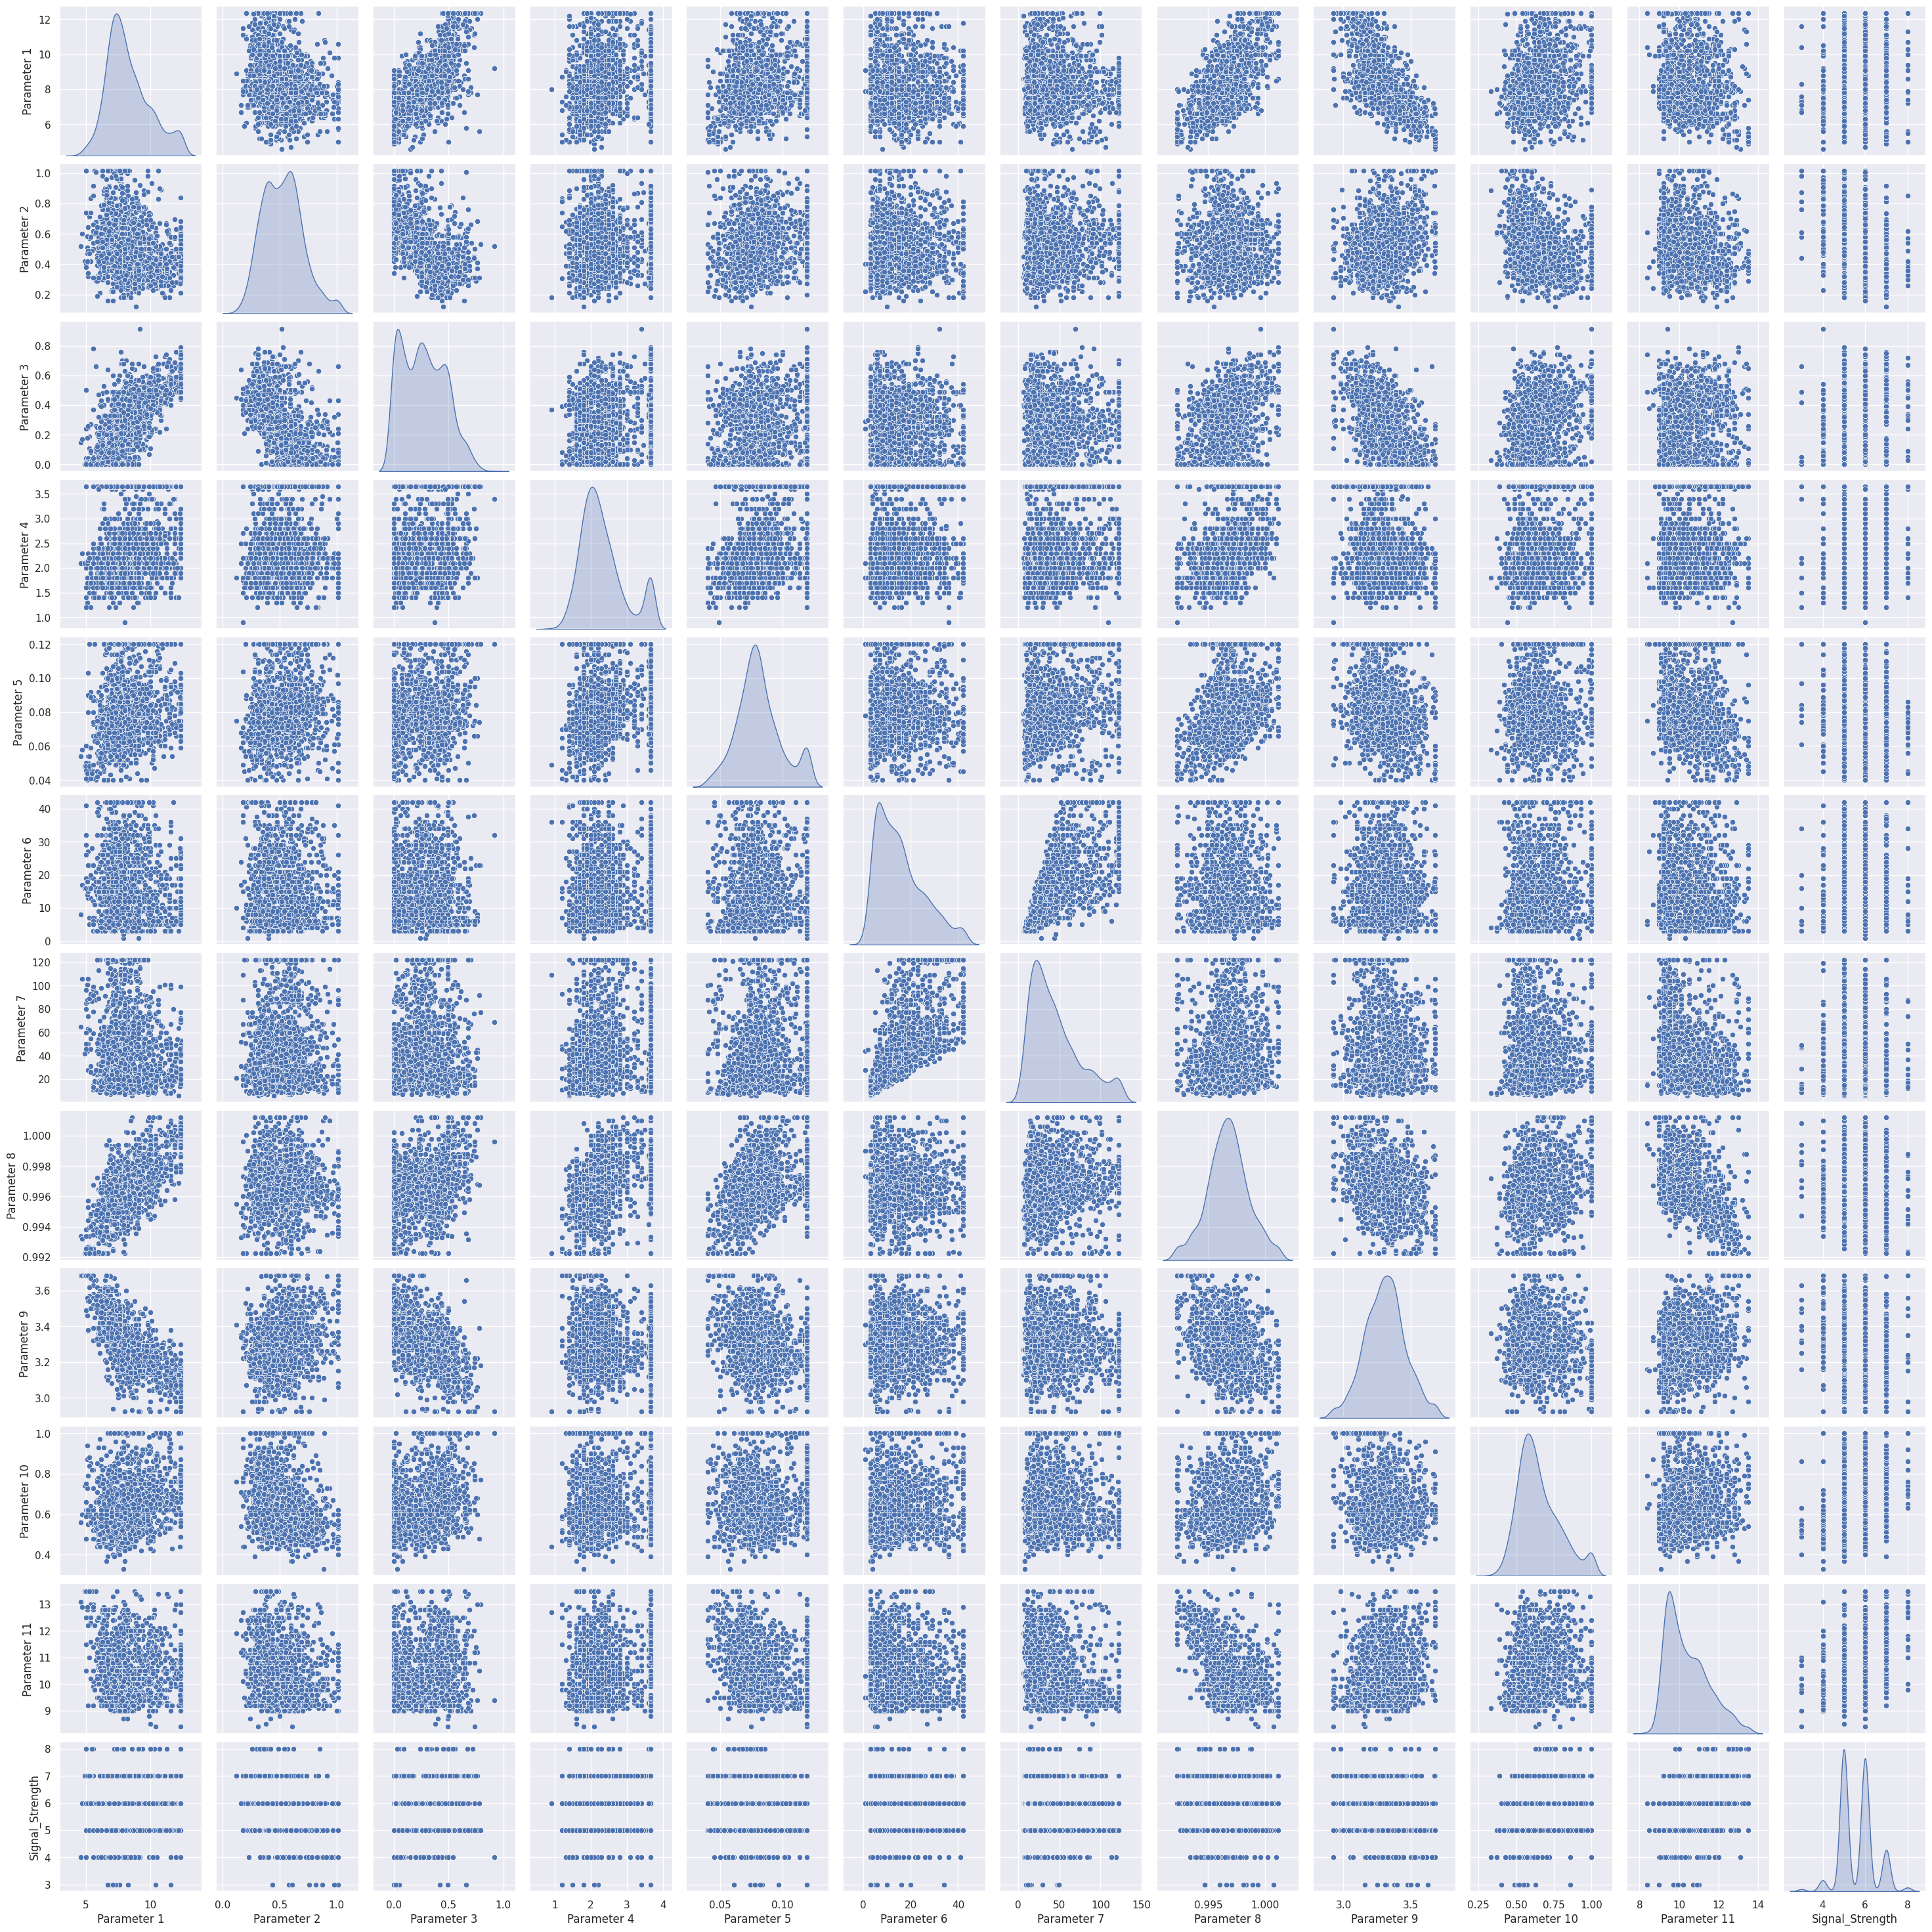

In [ ]:
# Pair plots
#We will be unable to view 200 odd variables , we will view a subset of 10 at a time in 2 plots just to get an idea
#sns.pairplot(signalDataDS.iloc[:,0:10],hue=signalDataDS['Pass/Fail'],diag_kind="kde")
sns.pairplot(signalDataDS,diag_kind="kde")

In [ ]:
# Correlation matrix
corrMat=signalDataDS.corr()
corrMat

Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1        1.0000000   -0.2681533    0.6787041    0.2150898   
Parameter 2       -0.2681533    1.0000000   -0.5607696    0.0394268   
Parameter 3        0.6787041   -0.5607696    1.0000000    0.1835527   
Parameter 4        0.2150898    0.0394268    0.1835527    1.0000000   
Parameter 5        0.2284839    0.1330963    0.1476676    0.2084711   
Parameter 6       -0.1570831   -0.0052877   -0.0601400    0.0829325   
Parameter 7       -0.1194856    0.0915834    0.0192773    0.1572502   
Parameter 8        0.6680756    0.0173470    0.3698925    0.4243544   
Parameter 9       -0.6898242    0.2353473   -0.5460018   -0.0945843   
Parameter 10       0.2151955   -0.3161812    0.3334016    0.0349957   
Parameter 11      -0.0702424   -0.2093854    0.1116404    0.1071145   
Signal_Strength    0.1254418   -0.3876082    0.2271444    0.0237903   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Parameter 1        0.2284839   -0.1570831   -0.1194856    0.6680756   
Parameter 2        0.1330963   -0.0052877    0.0915834    0.0173470   
Parameter 3        0.1476676   -0.0601400    0.0192773    0.3698925   
Parameter 4        0.2084711    0.0829325    0.1572502    0.4243544   
Parameter 5        1.0000000   -0.0121686    0.0980542    0.4074408   
Parameter 6       -0.0121686    1.0000000    0.6871845   -0.0340124   
Parameter 7        0.0980542    0.6871845    1.0000000    0.0958712   
Parameter 8        0.4074408   -0.0340124    0.0958712    1.0000000   
Parameter 9       -0.2595122    0.0754150   -0.0518626   -0.3368699   
Parameter 10       0.1076453    0.0490856   -0.0032293    0.1613100   
Parameter 11      -0.2956079   -0.0680990   -0.2288605   -0.5002372   
Signal_Strength   -0.1830368   -0.0506407   -0.2015425   -0.1763301   

                 Parameter 9  Parameter 10  Parameter 11  Signal_Strength  
Parameter 1       -0.6898242     0.2151955    -0.0702424        0.1254418  
Parameter 2        0.2353473    -0.3161812    -0.2093854       -0.3876082  
Parameter 3       -0.5460018     0.3334016     0.1116404        0.2271444  
Parameter 4       -0.0945843     0.0349957     0.1071145        0.0237903  
Parameter 5       -0.2595122     0.1076453    -0.2956079       -0.1830368  
Parameter 6        0.0754150     0.0490856    -0.0680990       -0.0506407  
Parameter 7       -0.0518626    -0.0032293    -0.2288605       -0.2015425  
Parameter 8       -0.3368699     0.1613100    -0.5002372       -0.1763301  
Parameter 9        1.0000000    -0.1347023     0.1951962       -0.0615069  
Parameter 10      -0.1347023     1.0000000     0.1553103        0.3287104  
Parameter 11       0.1951962     0.1553103     1.0000000        0.4785563  
Signal_Strength   -0.0615069     0.3287104     0.4785563        1.0000000

<Figure size 1500x1500 with 0 Axes>

<Axes: >

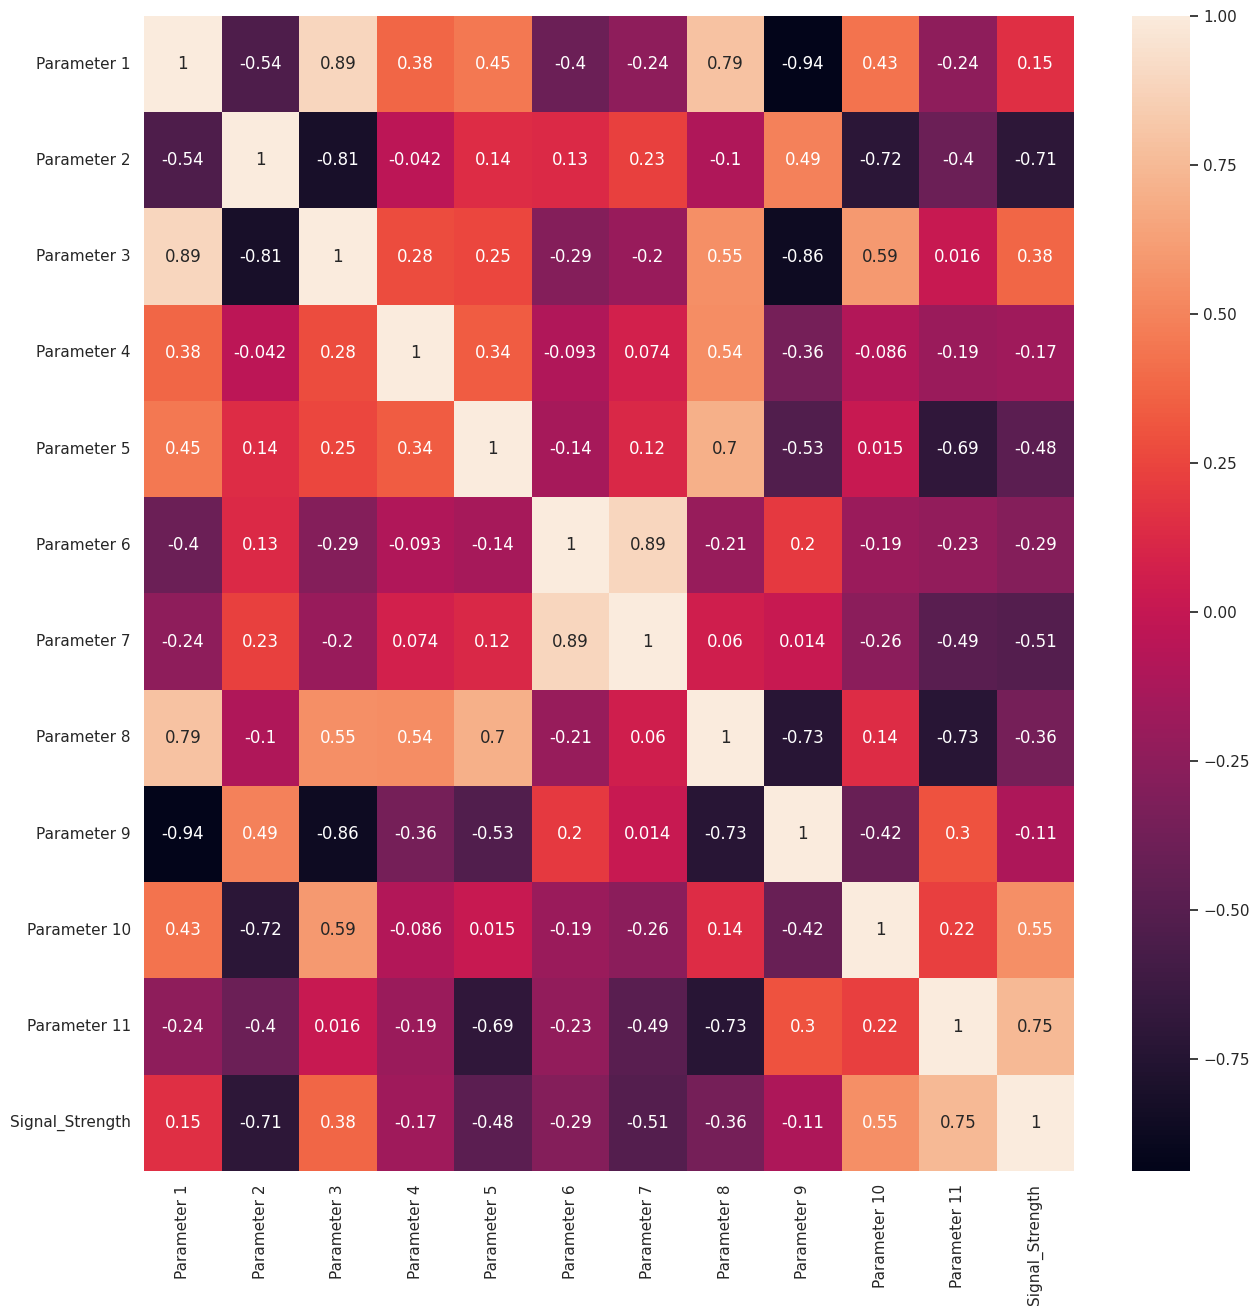

In [ ]:
# Heat Map
#Heat Map of Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(corrMat.corr(), annot=True )  # heatmap
plt.show()

# **Inference/Result for 3.0**
Visual analysis of scatter plots:
-There seem to be atleast 3 groups/clusters amongst the variables that we have viewed
Some variables are higly correlated , some are not correlated with each other
Variables Param2 and Param 11 seem to hihly corrleated with output variable
Highly correlated variables(Collinearity) will have an impact on almost all ML algorithms but not on Neural Networks . Since we are solving this problem using Neural Networks , we will proceed withoout using any technique to reduce multi-collinearity

In [ ]:
# Before proceeding , lets do a quick check on data
signalDataDS.isna().sum().sum()

0

In [ ]:
X=signalDataDS.drop(columns=['Signal_Strength'],axis=1)
Y=signalDataDS['Signal_Strength']
pd.DataFrame(X).isna().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y,test_size=0.3,random_state=1)
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (1119, 11)
X_Test.shape (480, 11)
Y_Train.shape (1119,)
Y_Test.shape (480,)


In [ ]:
#Applying MinMax Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X_Train = pd.DataFrame(StandardScaler().fit_transform(X_Train))
X_Test = pd.DataFrame(StandardScaler().fit_transform(X_Test))
pd.DataFrame(X_Train).isna().sum().sum()
pd.DataFrame(X_Test).isna().sum().sum()
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

0

0

X_Train.shape (1119, 11)
X_Test.shape (480, 11)
Y_Train.shape (1119,)
Y_Test.shape (480,)


In [ ]:
# Lets do a quick sanity check on the data to make sure its not corrupted
X_Train.describe()
Y_Train.describe()
X_Test.describe()
Y_Test.describe()

0            1            2            3            4   \
count 1119.0000000 1119.0000000 1119.0000000 1119.0000000 1119.0000000   
mean     0.0000000   -0.0000000    0.0000000    0.0000000   -0.0000000   
std      1.0004471    1.0004471    1.0004471    1.0004471    1.0004471   
min     -2.1910530   -2.3798636   -1.3555365   -2.3432697   -2.3560161   
25%     -0.7076739   -0.7509161   -0.9023786   -0.7007498   -0.5927782   
50%     -0.2329926   -0.0527957   -0.0967646   -0.2079938   -0.0808704   
75%      0.5680321    0.6453246    0.7592003    0.4490142    0.5447947   
max      2.4074222    2.8269507    3.2515688    2.1736601    2.1942754   

                5            6            7            8            9   \
count 1119.0000000 1119.0000000 1119.0000000 1119.0000000 1119.0000000   
mean     0.0000000   -0.0000000    0.0000000   -0.0000000    0.0000000   
std      1.0004471    1.0004471    1.0004471    1.0004471    1.0004471   
min     -1.4836641   -1.2987314   -2.4436496   -2.5478862   -2.3198123   
25%     -0.8676841   -0.7639210   -0.6422942   -0.6742487   -0.7326096   
50%     -0.2517041   -0.2625362    0.0282932   -0.0168320   -0.2275906   
75%      0.5696026    0.5062537    0.6147179    0.5748430    0.5660107   
max      2.7255327    2.5786440    2.4106434    2.4484806    2.5139412   

                10  
count 1119.0000000  
mean     0.0000000  
std      1.0004471  
min     -1.9239394  
25%     -0.8878706  
50%     -0.2285541  
75%      0.6191386  
max      2.8796523

count   1119.0000000
mean       5.6559428
std        0.8182500
min        3.0000000
25%        5.0000000
50%        6.0000000
75%        6.0000000
max        8.0000000
Name: Signal_Strength, dtype: float64

0           1           2           3           4           5   \
count 480.0000000 480.0000000 480.0000000 480.0000000 480.0000000 480.0000000   
mean    0.0000000   0.0000000   0.0000000  -0.0000000   0.0000000   0.0000000   
std     1.0010433   1.0010433   1.0010433   1.0010433   1.0010433   1.0010433   
min    -2.0760406  -2.2406226  -1.4883628  -2.3142323  -2.2168616  -1.3205760   
25%    -0.6864429  -0.7851655  -0.8927921  -0.6757169  -0.6359039  -0.8219710   
50%    -0.2442981  -0.0854265  -0.0806502  -0.1841623  -0.1452618  -0.2236451   
75%     0.5294552   0.6702917   0.7991702   0.4712439   0.4544118   0.5990531   
max     2.5664791   2.7695087   2.7889177   2.1916850   2.1444011   2.5685426   

               6           7           8           9           10  
count 480.0000000 480.0000000 480.0000000 480.0000000 480.0000000  
mean    0.0000000   0.0000000   0.0000000  -0.0000000   0.0000000  
std     1.0010433   1.0010433   1.0010433   1.0010433   1.0010433  
min    -1.3333177  -2.6086214  -2.6375217  -2.0702628  -1.6089092  
25%    -0.7900303  -0.6066388  -0.7298348  -0.7192756  -0.8362948  
50%    -0.2467430  -0.0494009  -0.0361304  -0.1938917  -0.2568339  
75%     0.5681880   0.5602144   0.6575739   0.5566568   0.6123573  
max     2.3738194   2.5942054   2.6346313   2.6581924   3.0267774

count   480.0000000
mean      5.5895833
std       0.7809687
min       3.0000000
25%       5.0000000
50%       6.0000000
75%       6.0000000
max       8.0000000
Name: Signal_Strength, dtype: float64

In [ ]:
X_Train.isna().sum().sum()
Y_Train.isna().sum().sum()
X_Test.isna().sum().sum()
Y_Test.isna().sum().sum()

0

0

0

0

In [ ]:
# Lets convert all Dataframes to arrays
NN_X_Train=np.array(X_Train)
NN_X_Test=np.array(X_Test)
NN_Y_Train=np.array(Y_Train)
NN_Y_Test=np.array(Y_Test)

In [ ]:
#Lets create a dataframe to store results from each FINAL model that we arrive at
ResultsDF=pd.DataFrame(columns=['Model_Type','TrainData_Loss','TestData_Loss','Comments'])
ResultsDF

Empty DataFrame
Columns: [Model_Type, TrainData_Loss, TestData_Loss, Comments]
Index: []

In [ ]:
# Cross Check

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_Train, Y_Train)
print(regression_model.score(X_Train, Y_Train))
print(regression_model.score(X_Test, Y_Test))


# Let us also check R square score of this model
from  sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Rsquare_Train=r2_score(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_Test=r2_score(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

Rsquare_MAE_Train=mean_absolute_error(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_MAE_Test=mean_absolute_error(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

Rsquare_RMSE_Train=mean_squared_error(np.array(Y_Train).reshape(-1,1), regression_model.predict(X_Train))
Rsquare_RMSE_Test=mean_squared_error(np.array(Y_Test).reshape(-1,1), regression_model.predict(X_Test))

print("Rsquare_Train",Rsquare_Train)
print("Rsquare_Test",Rsquare_Test)
print("Rsquare_MAE_Train",Rsquare_MAE_Train)
print("Rsquare_MAE_Test",Rsquare_MAE_Test)
print("Rsquare_RMSE_Train",Rsquare_RMSE_Train)
print("Rsquare_RMSE_Test",Rsquare_RMSE_Test)

LinearRegression()

0.3854703708136178
0.31382573611144615
Rsquare_Train 0.3854703708136178
Rsquare_Test 0.31382573611144615
Rsquare_MAE_Train 0.49944597065104845
Rsquare_MAE_Test 0.49922818506188693
Rsquare_RMSE_Train 0.4110802211706979
Rsquare_RMSE_Test 0.41763412846942616


Above we have a built a linear regrssion model on the same data as a baseline Our neural networks gives us the capability of modelling function of functions, therefore, it should:
1. be able to perform atleast better than the above , if not , at power
2. We could use this R square score MAE score from a linear regression as a baseline to check

In [ ]:
# Start building the NN model

In [ ]:
NN_X_Train.shape
NN_X_Test.shape
NN_Y_Train.shape
NN_Y_Test.shape

(1119, 11)

(480, 11)

(1119,)

(480,)

In [ ]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with
regressorModel.add(Dense(input_dim = 11, units=1))
optimizationConfig="Baseline:No Hidden Layers,No Activation"

In [ ]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(learning_rate = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [ ]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.1309 - mae: 5.6481 - val_loss: 31.4607 - val_mae: 5.4961
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.7123 - mae: 5.5151 - val_loss: 30.3358 - val_mae: 5.4033
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.8618 - mae: 5.4530 - val_loss: 29.2428 - val_mae: 5.3110
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.9163 - mae: 5.3797 - val_loss: 28.2083 - val_mae: 5.2196
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2418 - mae: 5.2234 - val_loss: 27.1943 - val_mae: 5.1290
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6844 - mae: 5.1743 - val_loss: 26.2380 - val_mae: 5.0390
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.0072 - mae: 5.1201 - val_loss: 25.3001 - val_mae: 4.9498
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.6771 - mae: 4.9918 - val_loss: 24.3893 - val_mae: 4.8610
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [ ]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.5010756254196167 0.4950921833515167


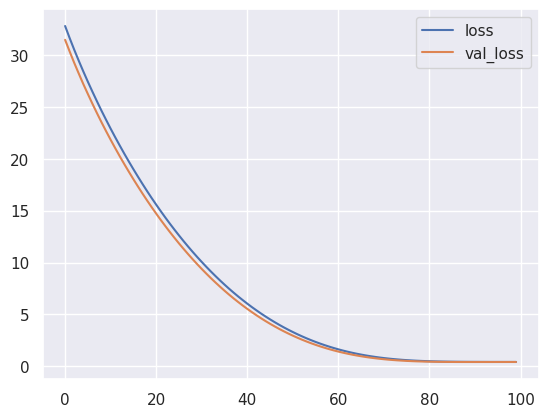

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

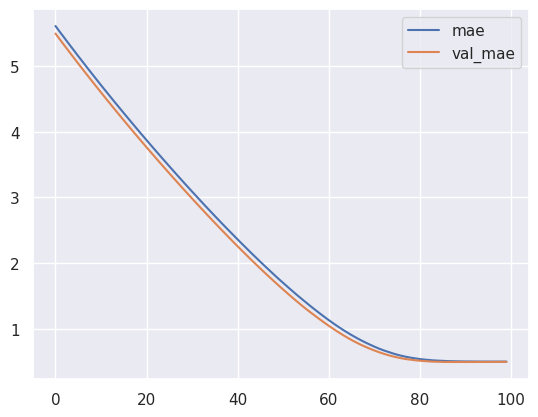

In [ ]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['mae'], label='mae')
plt.plot(historyRegressorModel.history['val_mae'], label='val_mae')
plt.legend()

In [ ]:
# Lets print final scores
# metric mae

regressorModel.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3421 - mae: 0.4485


[0.4133208096027374, 0.4969419538974762]

In [ ]:
NNPredictions=regressorModel.predict(np.array(NN_X_Test))

NNPredictionsTrain=regressorModel.predict(np.array(NN_X_Train))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Let us also check R square score of this model
from  sklearn.metrics import r2_score

rsquareTrain=r2_score(NN_Y_Train, NNPredictionsTrain)
rsquareTest=r2_score(NN_Y_Test, NNPredictions)
print("rsquareTrain",rsquareTrain)
print("rsquareTest",rsquareTest)

rsquareTrain 0.37941447010864304
rsquareTest 0.320912505608966


In [ ]:
# Capturing best results from above epoch
ResultsDF = pd.concat([ResultsDF, pd.DataFrame([{ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig}])], ignore_index=True)
ResultsDF

Model_Type  TrainData_Loss  TestData_Loss  \
0  Neural Network       0.5010756      0.4950922   

                                  Comments  
0  Baseline:No Hidden Layers,No Activation

-Add non linear Activation Function(as it is a Regression problem)
-Use relu and he weights intitilaisation
-Check if there is an improvment in results


In [ ]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with
regressorModel.add(Dense(input_dim = 11, units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Activation Added"

In [ ]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(learning_rate = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [ ]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29.0507 - mae: 5.2901 - val_loss: 27.2313 - val_mae: 5.1017
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5298 - mae: 5.1124 - val_loss: 26.3040 - val_mae: 4.9881
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1374 - mae: 5.0569 - val_loss: 25.4335 - val_mae: 4.8770
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.7798 - mae: 4.8918 - val_loss: 24.5780 - val_mae: 4.7613
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9299 - mae: 4.7777 - val_loss: 23.7712 - val_mae: 4.6454
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8187 - mae: 4.6299 - val_loss: 23.0341 - val_mae: 4.5367
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2849 - mae: 4.4265 - val_loss: 22.3649 - val_mae: 4.4391
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6709 - mae: 4.4569 - val_loss: 21.7510 - val_mae: 4.3452
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [ ]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.49913978576660156 0.4982846975326538


In [ ]:
# Capturing best results from above epoch
ResultsDF = pd.concat([ResultsDF, pd.DataFrame([{ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig}])], ignore_index=True)
ResultsDF

Model_Type  TrainData_Loss  TestData_Loss  \
0  Neural Network       0.5010756      0.4950922   
1  Neural Network       0.4991398      0.4982847   

                                  Comments  
0  Baseline:No Hidden Layers,No Activation  
1                         Activation Added

In [ ]:
######################################## Result ############################################################################
# No improvment observed fter added activation functions
# -Lets proceed , lets try to add hidden layers

In [ ]:

# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with
regressorModel.add(Dense(input_dim = 11, units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Added 1 hidden layer with Activations"

In [ ]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(learning_rate = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [ ]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 29.8403 - mae: 5.3803 - val_loss: 22.0621 - val_mae: 4.5012
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6307 - mae: 4.1565 - val_loss: 10.9497 - val_mae: 2.9751
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.7625 - mae: 2.7390 - val_loss: 5.1797 - val_mae: 1.9041
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1104 - mae: 1.9042 - val_loss: 3.3928 - val_mae: 1.4888
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5100 - mae: 1.5236 - val_loss: 2.6484 - val_mae: 1.3085
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6738 - mae: 1.3293 - val_loss: 2.2183 - val_mae: 1.1891
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0505 - mae: 1.1566 - val_loss: 1.9408 - val_mae: 1.1045
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9045 - mae: 1.1076 - val_loss: 1.7368 - val_mae: 1.0446
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

In [ ]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.44820094108581543 0.5254119038581848


In [ ]:
# Capturing best results from above epoch
ResultsDF = pd.concat([ResultsDF, pd.DataFrame([{ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig}])], ignore_index=True)
ResultsDF

Model_Type  TrainData_Loss  TestData_Loss  \
0  Neural Network       0.5010756      0.4950922   
1  Neural Network       0.4991398      0.4982847   
2  Neural Network       0.4482009      0.5254119   

                                  Comments  
0  Baseline:No Hidden Layers,No Activation  
1                         Activation Added  
2    Added 1 hidden layer with Activations

In [ ]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with
regressorModel.add(Dense(input_dim = 11, units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=24,activation='relu', kernel_initializer='he_normal'))
regressorModel.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))
optimizationConfig="Added 2 hidden layer with Activations"

In [ ]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(learning_rate = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [ ]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test))

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 24.8480 - mae: 4.7671 - val_loss: 4.1722 - val_mae: 1.7023
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4021 - mae: 1.5114 - val_loss: 2.7773 - val_mae: 1.3517
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3110 - mae: 1.2330 - val_loss: 2.2300 - val_mae: 1.2031
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9252 - mae: 1.0960 - val_loss: 1.9036 - val_mae: 1.1003
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7582 - mae: 1.0543 - val_loss: 1.7084 - val_mae: 1.0337
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4054 - mae: 0.9626 - val_loss: 1.5461 - val_mae: 0.9746
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2483 - mae: 0.8840 - val_loss: 1.3814 - val_mae: 0.9292
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1772 - mae: 0.8658 - val_loss: 1.3081 - val_mae: 0.8899
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.03

In [ ]:
best_train_score = min(historyRegressorModel.history['mae'])
best_test_score = min(historyRegressorModel.history['val_mae'])
print(best_train_score,best_test_score)

0.3753957152366638 0.5392836928367615


In [ ]:
# Capturing best results from above epoch
ResultsDF = pd.concat([ResultsDF, pd.DataFrame([{ 'Model_Type' :"Neural Network",'TrainData_Loss':best_train_score,'TestData_Loss':best_test_score,'Comments':optimizationConfig}])], ignore_index=True)
ResultsDF

Model_Type  TrainData_Loss  TestData_Loss  \
0  Neural Network       0.5010756      0.4950922   
1  Neural Network       0.4991398      0.4982847   
2  Neural Network       0.4482009      0.5254119   
3  Neural Network       0.3753957      0.5392837   

                                  Comments  
0  Baseline:No Hidden Layers,No Activation  
1                         Activation Added  
2    Added 1 hidden layer with Activations  
3    Added 2 hidden layer with Activations

**Result**
Slight increase in performace from previous run
But this is still not higher than base neural network model

In [ ]:
# Configuration for architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# Initializing the model
regressorModel = Sequential()
# Add one layer to begin with
regressorModel.add(Dense(input_dim = 11, units=1))
optimizationConfig="Baseline:No Hidden Layers,No Activation"

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=25)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True) # Changed the file extension to .keras

In [ ]:
from tensorflow.keras import optimizers

# Configuration for compiler
adam = optimizers.Adam(learning_rate = 0.001)
regressorModel.compile(optimizer=adam, loss='mse',metrics=['mae'])

In [ ]:
# Fit the model
historyRegressorModel=regressorModel.fit(NN_X_Train,NN_Y_Train, epochs=100,batch_size=12,validation_data=(NN_X_Test,NN_Y_Test), callbacks=[mc])

#regressorModel.fit(X_Train,Y_Train, epochs=20,batch_size=12,validation_data=(X_Test,Y_Test))

Epoch 1/100
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.8666 - mae: 5.6288
Epoch 1: val_loss improved from inf to 32.08967, saving model to best_model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 33.8451 - mae: 5.6273 - val_loss: 32.0897 - val_mae: 5.4959
Epoch 2/100
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.1533 - mae: 5.5772
Epoch 2: val_loss improved from 32.08967 to 30.91479, saving model to best_model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.0021 - mae: 5.5661 - val_loss: 30.9148 - val_mae: 5.4033
Epoch 3/100
86/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.0583 - mae: 5.4216
Epoch 3: val_loss improved from 30.91479 to 29.76947, saving model to best_model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.0677 - mae: 5.4220 - val_loss: 29.7695 - val_mae: 5.3111
Epoch 4/100
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.9314 - mae: 5.4126
Epoch 4: val_loss improved from 29.76947 to 28.66575, saving model to best_model.keras
94/94 ━━━━━━

In [ ]:
# Get the model

# Get the best model
from keras.models import load_model

# The file was saved as 'best_model.keras'
saved_model = load_model('best_model.keras')

In [ ]:
# Cross verify score on Validation data of the best model

saved_model.evaluate(np.array(NN_X_Test),np.array(NN_Y_Test))

# Looks good

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3386 - mae: 0.4436


[0.4129047095775604, 0.4935504198074341]

In [ ]:
model = saved_model
# Added '.keras' extension to the filename
model.save('FinalModel.keras')

**Final Result**
-- A very basic Neural Network with no hidden layers was able to model data very well(Result no 0 in Result Table above)

-- Further addition of layers and activations did not help increase performance

-- Regressor Model was able to acheive an MAE loss of close to 0(0.49 to be precise) on validation/test data

# **PART B**

In [2]:
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math
import io
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
tensorflow.__version__

'2.17.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/MyDrive/Dataset'

 Autonomous_Vehicles_SVHN_single_grey1.h5  'NN Project Data - Signal.csv'


In [6]:
h5_SVH = h5py.File('/content/drive/MyDrive/Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [7]:
h5_SVH.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [8]:
# load the already splited train, validation and test data
X_train = h5_SVH['X_train'][:]
y_train = h5_SVH['y_train'][:]

X_val = h5_SVH['X_val'][:]
y_val = h5_SVH['y_val'][:]

X_test = h5_SVH['X_test'][:]
y_test = h5_SVH['y_test'][:]

In [9]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


The training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.
The test dataset(X_test) has 18k records each record being 32x32 in size.
y_train, y_test contain label for the given image matrix.

Label for the image is 6


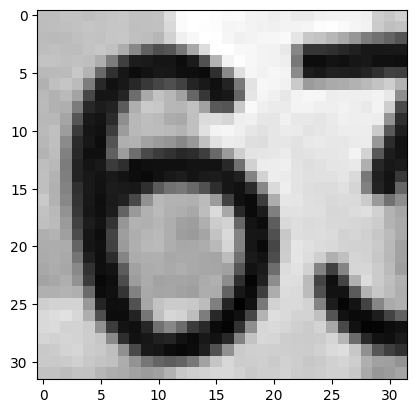

In [10]:
plt.imshow(X_train[1],cmap='gray')
print(f'Label for the image is {y_train[1]}')

We can clearly see that we have a partial view of digit 3, that is Noise!!

Lets Check Few more Images

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


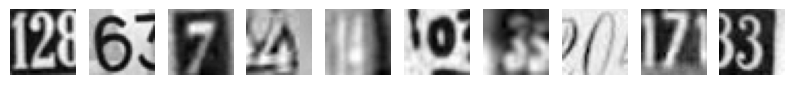

In [11]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

We can conclude there are lots of noise in data images

In [12]:
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


In [13]:
#normalize the values
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Max value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Max value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [14]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')

maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


In [15]:
#One hot encode the labels for train and test data
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


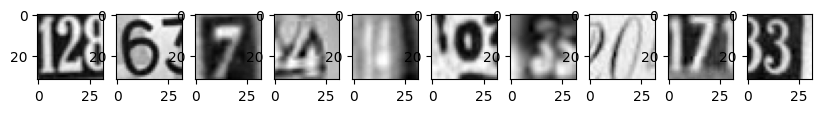

In [16]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

In [17]:
def model(iterations, learning_rate, Lambda, verb=0, eval_test=False):
    scores=[]
    # Use learning_rate parameter instead of lr
    learning_rate=learning_rate
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(learning_rate=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])

    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

In [18]:
iterations = 1
learning_rate=0.0001
Lambda=0
score=model(iterations, learning_rate, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1512 - loss: 2.2906

Loss is 2.295642614364624 and Accuracy is 0.14270000159740448


Loss is pretty high and so the accuracy which is probability of being a certain digit among 10 classes is 14%(equal for all classes).
Loss is here calculated via the softmax and crossentropy which is basically -y.ln(0.10) .

In [19]:
iterations = 1
learning_rate=1e3
Lambda=0
score=model(iterations, learning_rate, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.2596 - loss: nan

Loss is nan and Accuracy is 0.10000000149011612


Loss Exploded thus a great sign that we are moving in correct direction
So our Model is behaving right

We can start with coarse values and then tune the model with fine values.

In [20]:
iterations = 50
learning_rate=1e-4
Lambda=1e-7
score=model(iterations, learning_rate, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7790 - loss: 0.7299
Loss is 0.6144744753837585 and Accuracy is 0.809583306312561


With random hit, we get 80% accuracy that seems quite right, let's try few more experiments

In [21]:
iterations = 10
learning_rate=2.0
Lambda=1e-2
score=model(iterations, learning_rate, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2596 - loss: 2279451392.0000
Loss is 4840905216.0 and Accuracy is 0.10000000149011612


Loss is too high as Learning rate=2 is too high for model.

Trying using random value in a certain range

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7798 - loss: 0.7573
Loss is 0.7239871025085449 and Accuracy is 0.7836166620254517 with learning rate 0.004405792804651755 and Lambda 0.00029598110813056436

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7080 - loss: 0.9743
Loss is 0.8178548812866211 and Accuracy is 0.7519999742507935 with learning rate 0.00012060275472327192 and Lambda 9.687191071191768e-05

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7502 - loss: 0.8019
Loss is 0.708694338798523 and Accuracy is 0.78125 with learning rate 0.0026416206978660743 and Lambda 3.692306989107925e-07

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0397 - loss: 2.3078
Loss is 2.304520606994629 and Accuracy is 0.10000000149011612 with learning rate 0.04855415812795334 and Lambda 2.0418949612367196e-06

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8072 - loss: 0.6557
Loss is 0.6024482846260071 and Accuracy is 0.815583348274231 with learning r

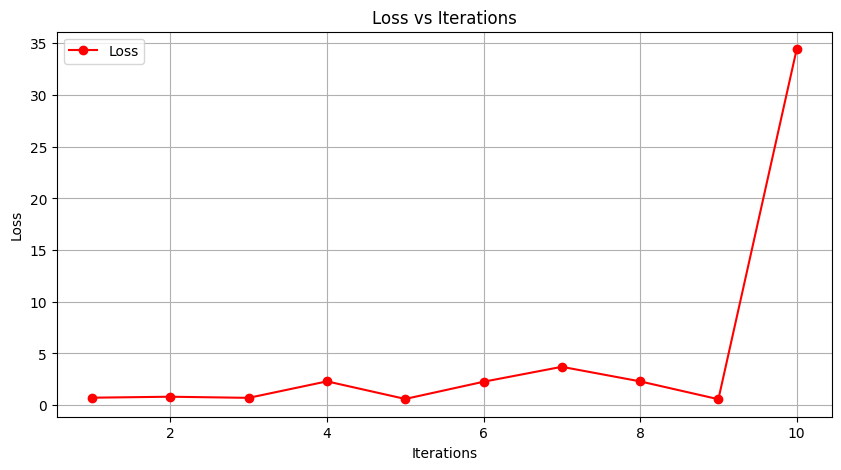

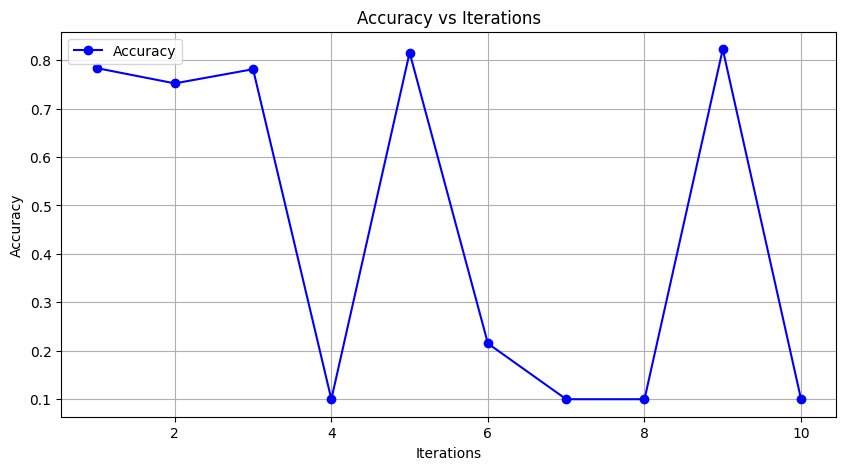

In [22]:
# Lists to store the history of loss and accuracy values
loss_history = []
accuracy_history = []
results = []

for i in range(10):
    lr = math.pow(10, np.random.uniform(-4.0, 1.0))   # Random learning rate
    Lambda = math.pow(10, np.random.uniform(-7, -2))  # Random Lambda
    iterations = 30

    # Assuming model(iterations, lr, Lambda) returns a tuple (loss, accuracy)
    score = model(iterations, lr, Lambda)

    # Store the loss and accuracy in separate lists
    loss_history.append(score[0])
    accuracy_history.append(score[1])

    # Store the result message in the results list
    result = f'Loss is {score[0]} and Accuracy is {score[1]} with learning rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

    # Plotting the loss over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), loss_history, marker='o', color='r', label='Loss')
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_history, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Accuracy:**

Accuracy fluctuates significantly across iterations, dropping to near-random (10%) levels at several points.
Unstable, indicating issues with model convergence or hyperparameter settings.

**Loss:**
Mostly stable but spikes drastically at iteration 10, suggesting model divergence.

**Recommendations:**
Use Lower learning rate for stability.
Adjust Lambda to improve regularization.
Review model architecture for better generalization.

Settling with learning rate 0.00010052921434888933 and Lambda 0.0011939458972608135

In [24]:
learning_rate= 0.00010052921434888933
Lambda= 0.0011939458972608135
iterations = 100
eval_test= True
scores = model(iterations, learning_rate, Lambda,verb=0, eval_test=True)

In [26]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.284527987241745 Accuracy is 0.9119047522544861

Validation Dataset Loss is 0.4027746021747589 Accuracy is 0.8867666721343994

Test Dataset Loss is 0.6786825060844421 Accuracy is 0.8281111121177673

